# NSL-KDD Dataset Exploration\n

Comprehensive analysis of the NSL-KDD intrusion detection dataset.

## Objectives
1. Load and explore the NSL-KDD dataset
2. Understand feature distributions and characteristics
3. Analyze attack patterns and class distributions
4. Identify data quality issues and preprocessing needs
5. Generate insights for model development

In [2]:
# Import libraries
import sys
import os
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nsl_kdd_analyzer import NSLKDDAnalyzer

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("📊 NSL-KDD Analysis Environment Ready!")

📊 NSL-KDD Analysis Environment Ready!


## 1. Initialize Analyzer and Load Data

In [15]:
# Initialize the analyzer
analyzer = NSLKDDAnalyzer(data_dir="../data/raw/", output_dir="../data/results/")
print("Available data files:\n")
for file in analyzer.data_dir.glob("*.txt"):
    size_mb = file.stat().st_size / (1024 * 1024)
    print(f"  📄 {file.name:<25} ({size_mb:.1f} MB)")

Available data files:

  📄 KDDTrain+_20Percent.txt   (3.6 MB)
  📄 KDDTest+.txt              (3.3 MB)
  📄 KDDTrain+.txt             (18.2 MB)


## 2. Quick Analysis with 20% Subset

In [14]:
# Start with 20% subset for faster analysis
print("🔍 Analyzing 20% Training Subset...")
train_20_data = analyzer.load_data('KDDTrain+_20Percent.txt')

if train_20_data is not None:
    print(f"\n📊 Dataset Overview:")
    print(f"   Shape: {train_20_data.shape}")
    print(f"   Records: {len(train_20_data):,}")
    print(f"   Features: {train_20_data.shape[1] - 2}")

    # Display first few rows
    print(f"\n📋 Sample Data:")
    display(train_20_data.head())

🔍 Analyzing 20% Training Subset...
✓ Successfully loaded data from KDDTrain+_20Percent.txt
  Shape: (25192, 44)
  Features: 43 (41 features + 2 labels)

📊 Dataset Overview:
   Shape: (25192, 44)
   Records: 25,192
   Features: 42

📋 Sample Data:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level,attack_category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,Normal


## 3. Attack Distribution Analysis

In [16]:
# Attack category analysis
if train_20_data is not None:
    print("🎯 Attack Category Analysis:\n")
    attack_summary = train_20_data['attack_category'].value_counts()
    print(attack_summary)

    # Calculate percentages
    attack_percentages = (attack_summary / len(train_20_data) * 100).round(2)
    print("\nPercentages:")
    for category, percentage in attack_percentages.items():
        print(f"  {category}: {percentage}%")

🎯 Attack Category Analysis:

attack_category
Normal    13449
DoS        9234
Probe      2289
R2L         209
U2R          11
Name: count, dtype: int64

Percentages:
  Normal: 53.39%
  DoS: 36.65%
  Probe: 9.09%
  R2L: 0.83%
  U2R: 0.04%


In [6]:
# Detailed attack type analysis
if train_20_data is not None:
    print("🔍 Detailed Attack Types:")
    attack_details = train_20_data.groupby(['attack_category', 'attack_type']).size().reset_index(name='count')
    attack_details['percentage'] = (attack_details['count'] / len(train_20_data) * 100).round(3)
    display(attack_details.sort_values('count', ascending=False))

🔍 Detailed Attack Types:


,attack_category,attack_type,count,percentage
6,Normal,normal,13449,53.386
2,DoS,neptune,8282,32.876
7,Probe,ipsweep,710,2.818
10,Probe,satan,691,2.743
9,Probe,portsweep,587,2.330
4,DoS,smurf,529,2.100
8,Probe,nmap,301,1.195
0,DoS,back,196,0.778
5,DoS,teardrop,188,0.746
17,R2L,warezclient,181,0.718


## 4. Visualization

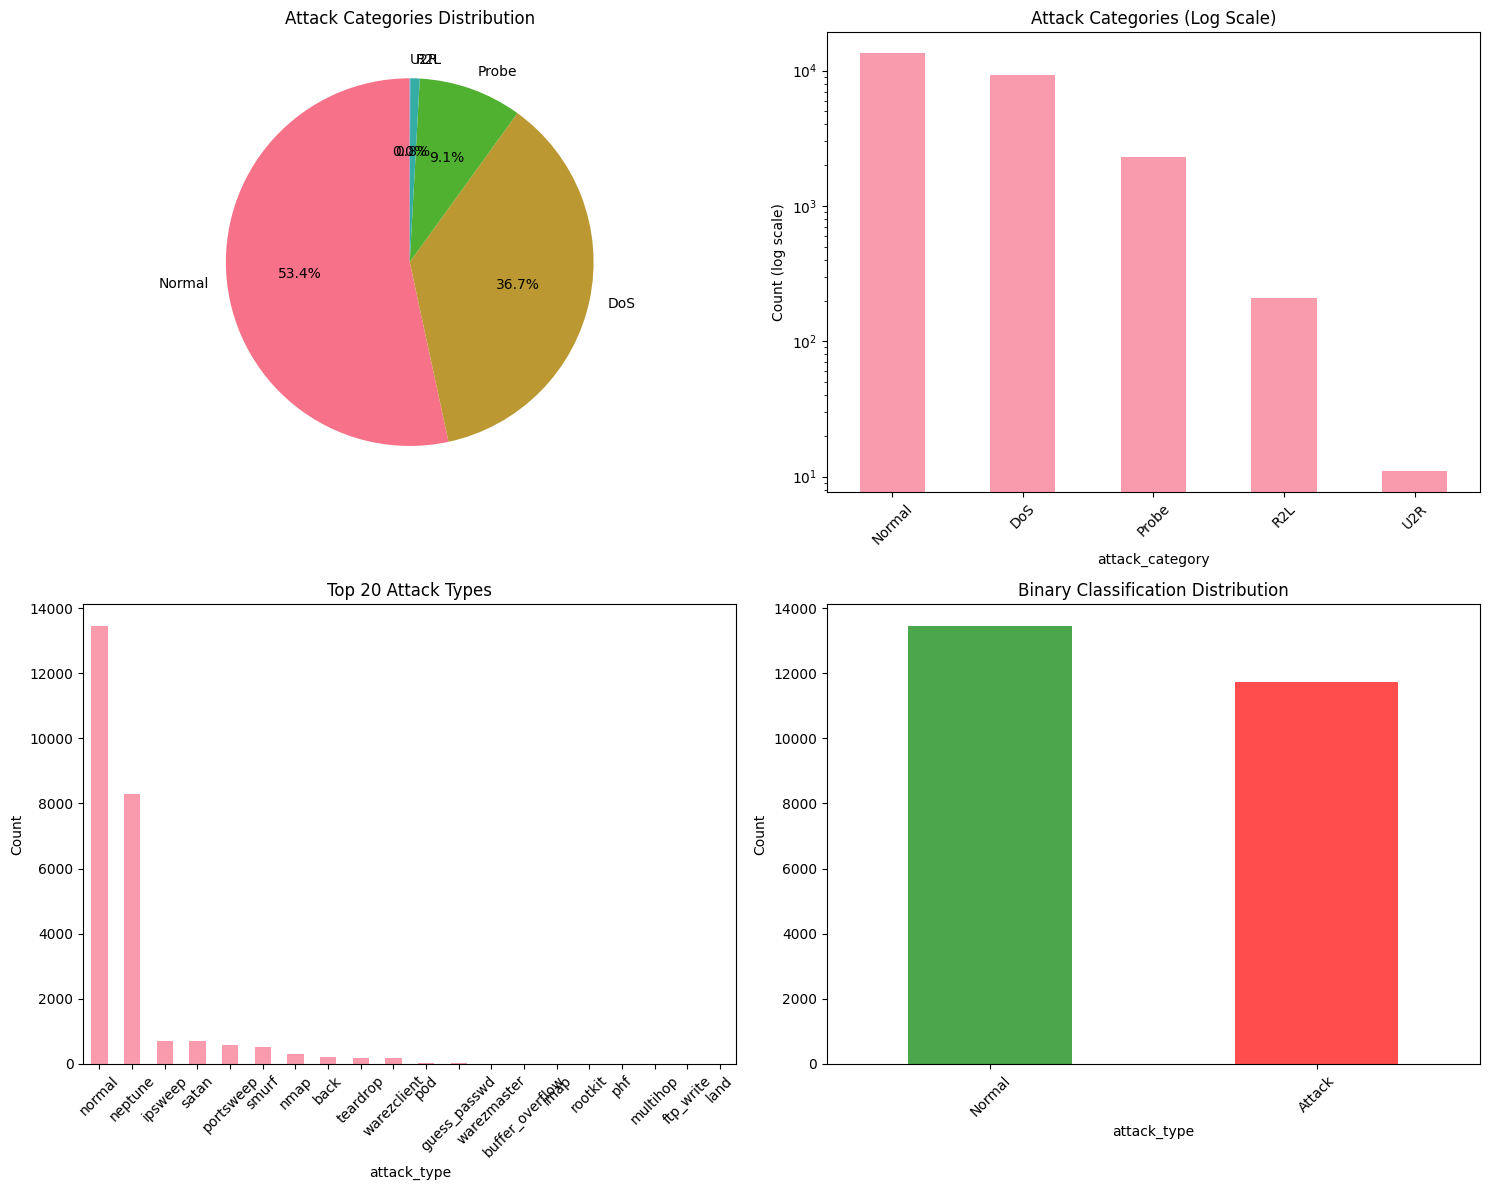

In [7]:
# Create visualizations
if train_20_data is not None:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Attack categories pie chart
    attack_cat_counts = train_20_data['attack_category'].value_counts()
    axes[0, 0].pie(attack_cat_counts.values, labels=attack_cat_counts.index, autopct='%1.1f%%', startangle=90)
    axes[0, 0].set_title('Attack Categories Distribution')

    # Attack categories bar chart (log scale)
    attack_cat_counts.plot(kind='bar', ax=axes[0, 1], alpha=0.7, logy=True)
    axes[0, 1].set_title('Attack Categories (Log Scale)')
    axes[0, 1].set_ylabel('Count (log scale)')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Top 20 attack types
    top_attacks = train_20_data['attack_type'].value_counts().head(20)
    top_attacks.plot(kind='bar', ax=axes[1, 0], alpha=0.7)
    axes[1, 0].set_title('Top 20 Attack Types')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].tick_params(axis='x', rotation=45)

    # Binary classification (Normal vs Attack)
    binary_dist = train_20_data['attack_type'].apply(lambda x: 'Normal' if x == 'normal' else 'Attack').value_counts()
    binary_dist.plot(kind='bar', ax=axes[1, 1], alpha=0.7, color=['green', 'red'])
    axes[1, 1].set_title('Binary Classification Distribution')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

## 5. Feature Analysis

In [18]:
# Analyze numerical features
if train_20_data is not None:
    numerical_cols = train_20_data.select_dtypes(include=[np.number]).columns.tolist()
    # Remove labels
    numerical_cols = [col for col in numerical_cols if col not in ['difficulty_level']]

    print(f"📊 Numerical Features: {len(numerical_cols)}\n")
    print(f"First 10: {numerical_cols[:10]}\n")

    # Statistical summary for key features
    key_features = ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count']
    print(f"📈 Key Features Statistics:")
    display(train_20_data[key_features].describe())

📊 Numerical Features: 38

First 10: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised']

📈 Key Features Statistics:


,duration,src_bytes,dst_bytes,count,srv_count
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,84.591180,27.698754
std,2686.555640,2.410805e+06,8.883072e+04,114.673451,72.468242
min,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000
25%,0.000000,0.000000e+00,0.000000e+00,2.000000,2.000000
50%,0.000000,4.400000e+01,0.000000e+00,14.000000,8.000000
75%,0.000000,2.790000e+02,5.302500e+02,144.000000,18.000000
max,42862.000000,3.817091e+08,5.151385e+06,511.000000,511.000000


## 6. Next Steps and Insights

In [19]:
# Summary and next steps
if train_20_data is not None:
    print("🎯 KEY INSIGHTS:")
    print("="*50)

    normal_pct = (train_20_data['attack_type'] == 'normal').mean() * 100
    attack_pct = 100 - normal_pct

    print(f"1. Dataset Characteristics:")
    print(f"   • Records: {len(train_20_data):,}")
    print(f"   • Features: {train_20_data.shape[1] - 2}")
    print(f"   • Attack types: {train_20_data['attack_type'].nunique()}")

    print(f"\n2. Class Distribution:")
    print(f"   • Normal traffic: {normal_pct:.1f}%")
    print(f"   • Attack traffic: {attack_pct:.1f}%")
    print(f"\n3. Key Challenges:")
    print(f"   • Severe class imbalance")
    print(f"   • Mixed data types (numerical + categorical)")
    print(f"   • High dimensionality (41 features)")
    print(f"\n4. Next Steps:")
    print(f"   • Create preprocessing pipeline")
    print(f"   • Handle class imbalance")
    print(f"   • Implement baseline models")
    print(f"   • Set up evaluation framework")
    print(f"\n✅ Exploration complete! Ready for preprocessing phase.")

🎯 KEY INSIGHTS:
1. Dataset Characteristics:
   • Records: 25,192
   • Features: 42
   • Attack types: 22

2. Class Distribution:
   • Normal traffic: 53.4%
   • Attack traffic: 46.6%

3. Key Challenges:
   • Severe class imbalance
   • Mixed data types (numerical + categorical)
   • High dimensionality (41 features)

4. Next Steps:
   • Create preprocessing pipeline
   • Handle class imbalance
   • Implement baseline models
   • Set up evaluation framework

✅ Exploration complete! Ready for preprocessing phase.
